In [1]:
!git clone https://github.com/eric-taylor-geo/sea-ice.git
%cd sea-ice
!pip install .

Cloning into 'sea-ice'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 147 (delta 57), reused 125 (delta 36), pack-reused 0 (from 0)
Receiving objects: 100% (147/147), 14.47 MiB | 8.95 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/sea-ice
Processing /content/sea-ice
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 4.8 MB/s eta 0:00:00
  Created wheel for sea-ice: filename=sea_ice-0.1.0-py3-none-any.whl size=13980 sha256=530bccdebe7319158b9e0193631d5af2faef07684f3bed3f84e7c530f325a11b
  Stored in directory: /root/.cache/pip/wheels/0c/60/88/4aa55beb70ca4dedd294a9c0430357074225621d9ec8716a64
Successfully built sea-ice


In [3]:
import seaice

In [10]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import os
os.chdir("/content/drive/MyDrive") # ensure weights and data is at root of drive

Mounted at /content/drive


In [11]:
x_path = "seaice_data/test/X/20201013T080448_dmi_prep.nc"
y_path = "seaice_data/test/Y/20201013T080448_dmi_prep_reference.nc"


input, target = seaice.data.data.load_x_y(x_path, y_path)

In [12]:
from seaice.predict.sliding_window import predict_sliding_window

model = seaice.models.utils.get_model("unet", load_weights=True)

pred = predict_sliding_window(model, input, stride=64)

Loaded weights for unet from seaice_weights/unet.pth


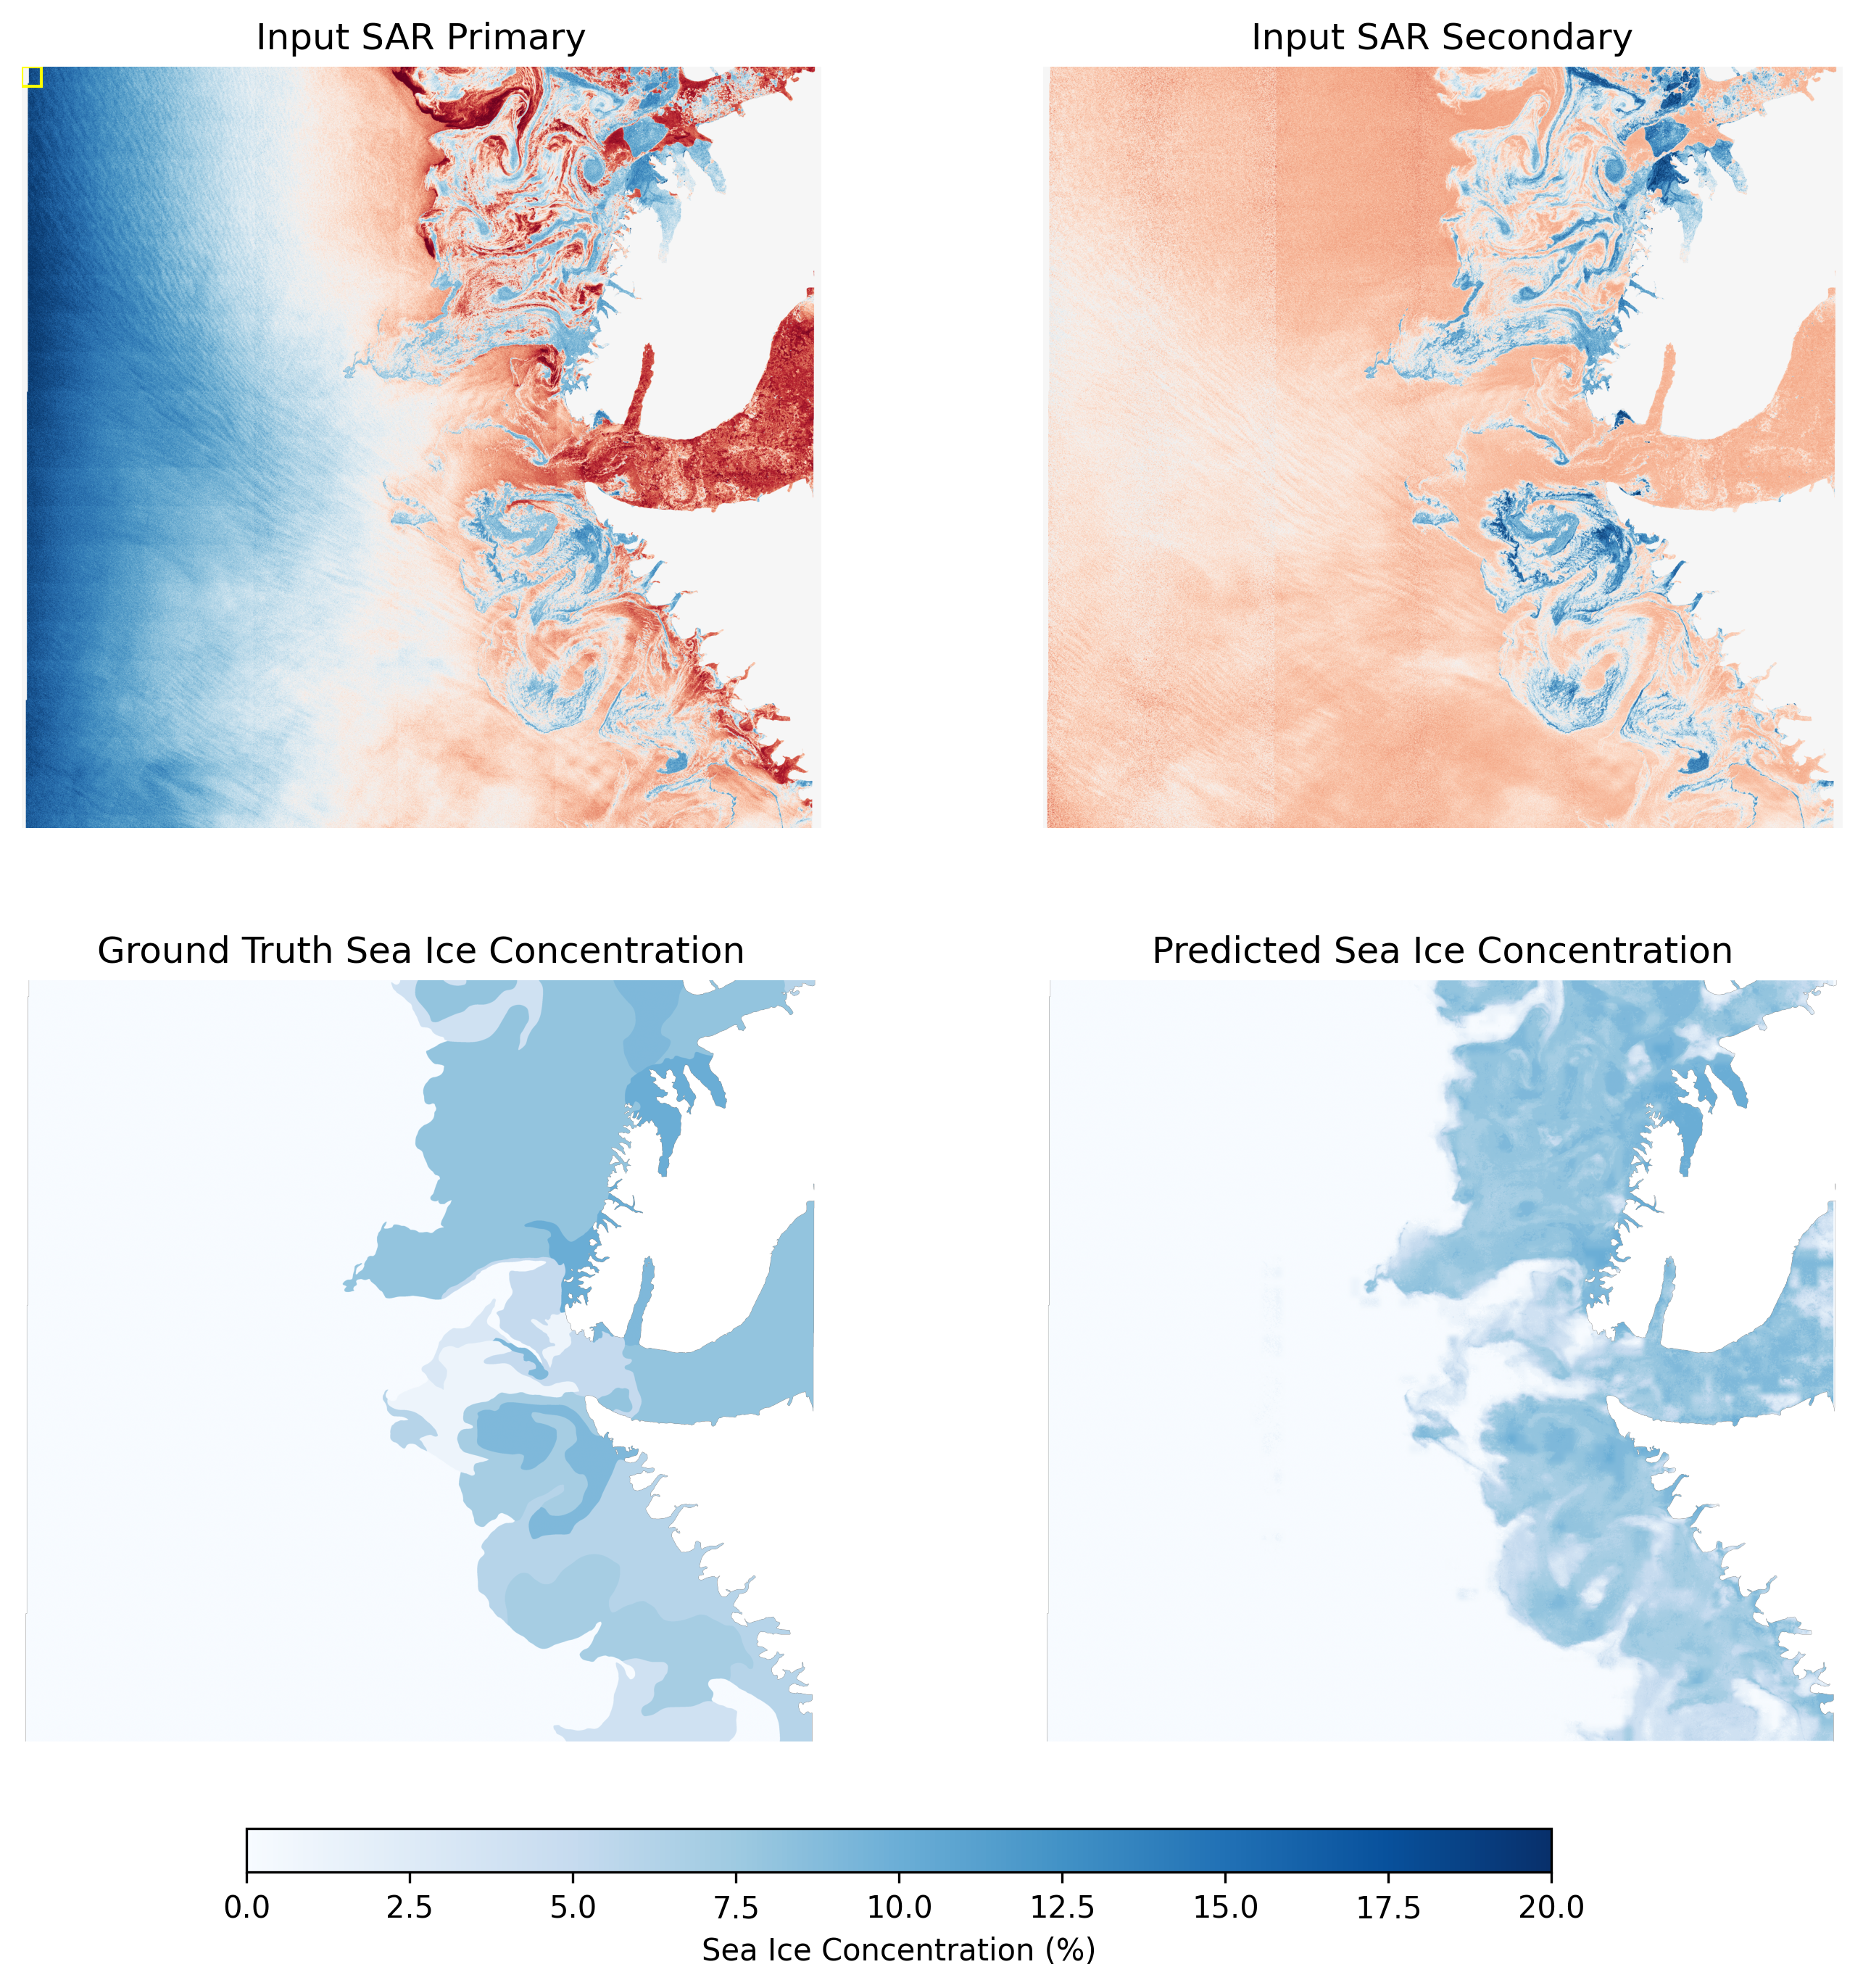

In [13]:
from seaice.visualisation import plot_prediction
import numpy as np

pred_land_mask = np.where(target > 100, np.nan, pred*10)
test_y_land_mask = np.where(target > 100, np.nan, target)

plot_prediction(input, test_y_land_mask, pred_land_mask)